# Introdução

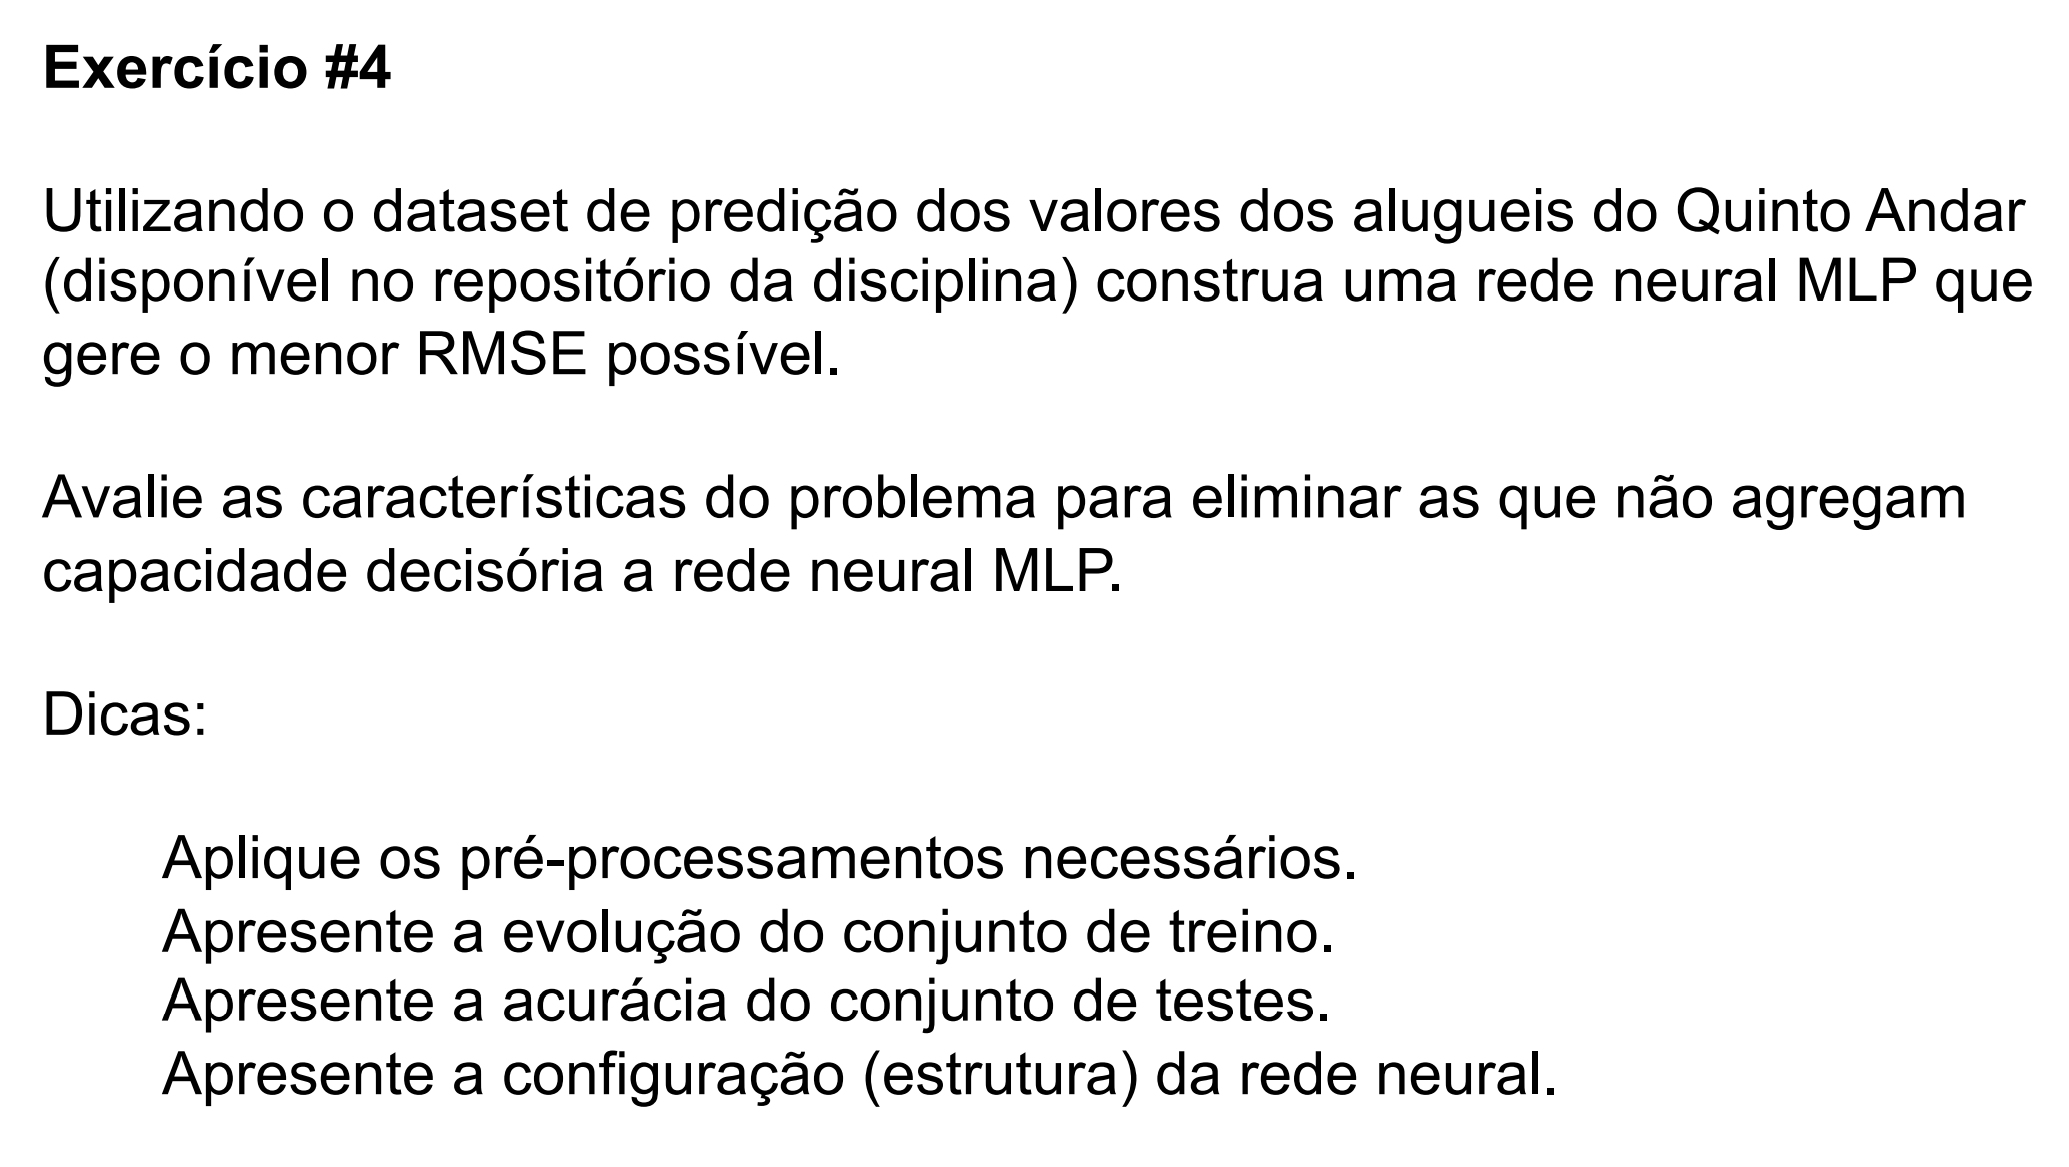

# Bicliotecas e Funções

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
import random

# Define a semente com o valor 42
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
pd.options.display.float_format = '{:.2f}'.format

# Código

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/deep%20learning%20I/quinto_andar/houses_to_rent_fiap.csv', sep = ';')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,211,42,3300
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,1750,63,4960
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,0,41,2800
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,22,17,1112
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,25,11,800
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,24,22,1478
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,973,191,15000
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,332,78,6000
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,279,155,12000


In [18]:
df.city.unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [7]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$)
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,366.70,53.30,3896.25
std,537.02,1.17,1.41,1.59,15592.31,3107.83,47.77,3408.55
min,11.00,1.00,1.00,0.00,0.00,0.00,3.00,450.00
25%,56.00,2.00,1.00,0.00,170.00,38.00,21.00,1530.00
50%,90.00,2.00,2.00,1.00,560.00,125.00,36.00,2661.00
75%,182.00,3.00,3.00,2.00,1237.50,375.00,68.00,5000.00
max,46335.00,13.00,10.00,12.00,1117000.00,313700.00,677.00,45000.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   property tax (R$)    10692 non-null  int64 
 10  fire insurance (R$)  10692 non-null  int64 
 11  rent amount (R$)     10692 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1002.5+ KB


## Correlação

C:\Users\KValim\AppData\Local\Temp\ipykernel_17780\2893186402.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\KValim\AppData\Local\Temp\ipykernel_17780\2893186402.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


[Text(0.5, 0, 'area'),
 Text(1.5, 0, 'rooms'),
 Text(2.5, 0, 'bathroom'),
 Text(3.5, 0, 'parking spaces'),
 Text(4.5, 0, 'hoa (R$)'),
 Text(5.5, 0, 'property tax (R$)'),
 Text(6.5, 0, 'fire insurance (R$)'),
 Text(7.5, 0, 'rent amount (R$)')]

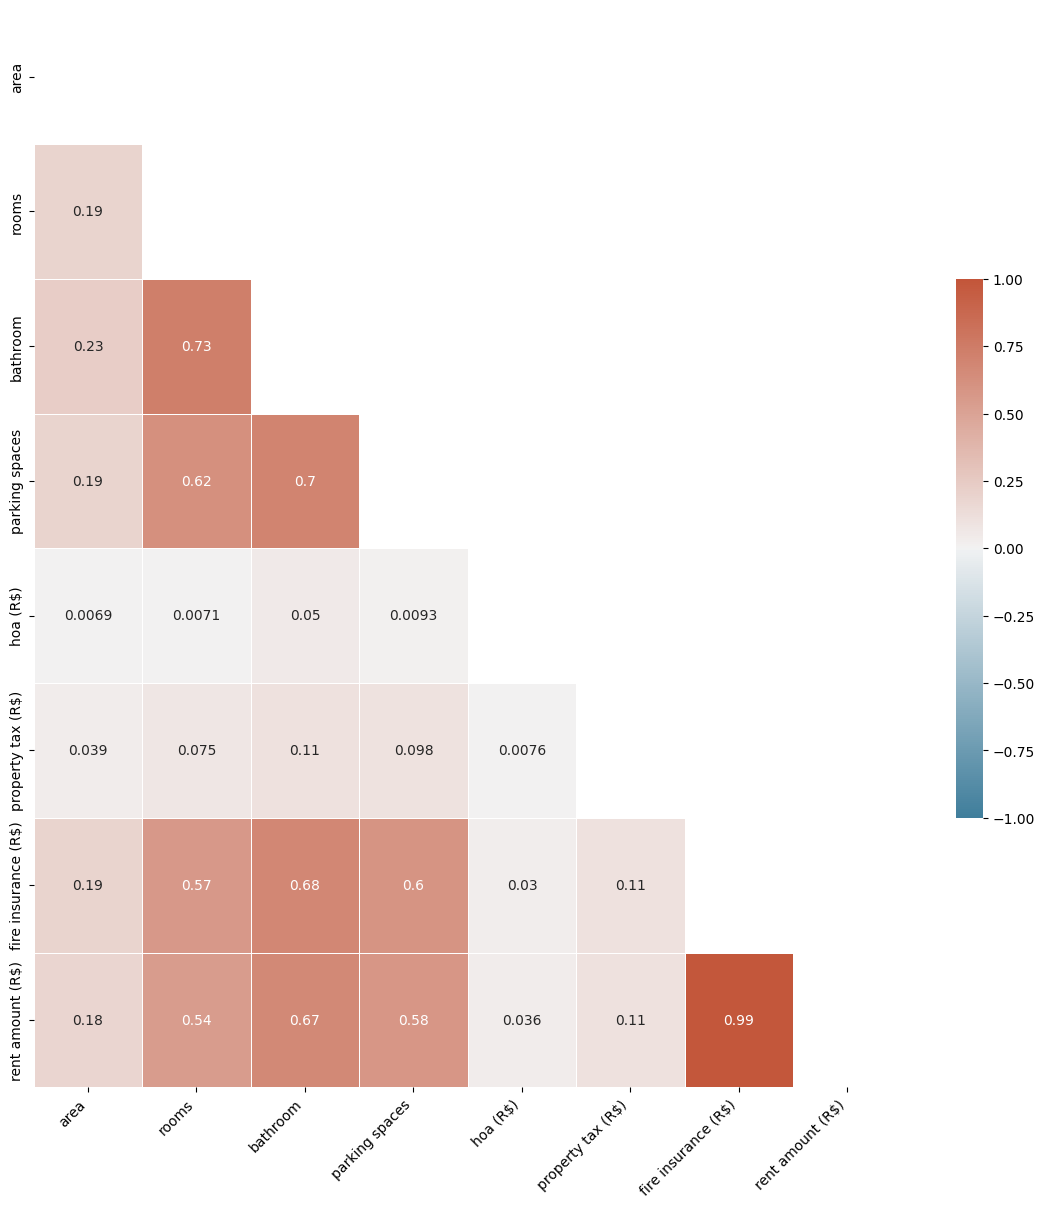

In [9]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (14, 14))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, 
                 vmin=-1, vmax=1, center=0, 
                 xticklabels = corr_mat.columns, 
                 yticklabels = corr_mat.columns, 
                 annot=True,
                 cmap=cmap,
                 linewidths=.5,
                 mask=mask,
                 cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Sem nenhuma variável com alta correlçação com a target!

Entretanto loudness tem grande correlação positiva com energy, e média correlação negaiva com acousticness, possibilitando algum enviezamento. Talvez sejá vantajoso retirar a variável loudness do modelo.

## Plots

In [10]:
continous_features = list(set(df.columns) - set(['target']) - set(['artist']) - set(['song_title']))
continous_features

['bathroom',
 'hoa (R$)',
 'parking spaces',
 'city',
 'area',
 'floor',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'animal',
 'furniture',
 'rooms']

TypeError: Horizontal orientation requires numeric `x` variable.

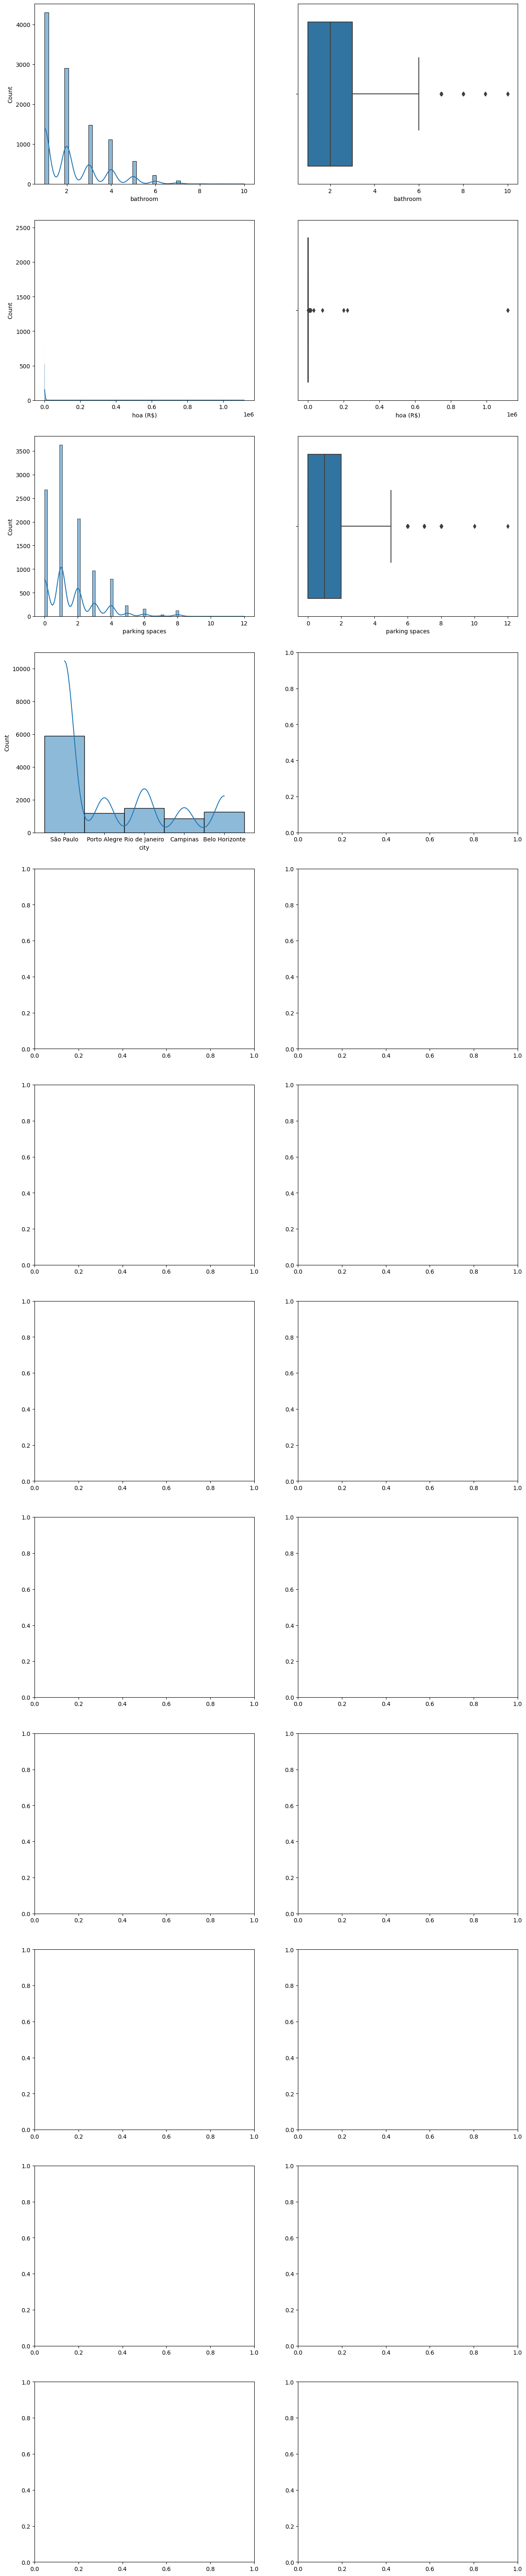

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [11]:
fig, axes = plt.subplots(nrows=len(continous_features),ncols=2,  figsize=(15, 80))
for i in range(len(continous_features)):
    feature = continous_features[i]
    plt.figure(figsize = (5, 5))
    data=df.copy()
    
    sns.histplot(x=data[feature], ax=axes[i][0], kde=True)
    sns.boxplot(x=data[feature], ax=axes[i][1])

Os gráficos boxplot demonstram que existem uma grande quantidade de outliers, que talvez diminua a saúde do dataset para o treinamento.

## Split Train Test

In [13]:
# df = df.drop(columns=['artist','song_title'])

In [15]:
# separa do dados em features e target
X = df.drop("rent amount (R$)", axis=1)
y = df["rent amount (R$)"]


In [16]:
# separa os dados de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Em seguida, padronizaremos os dados, mudando a escala através do StandardScaler

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'São Paulo'

In [ ]:
epochs = 100

## Modelo 1

In [ ]:
# modelo
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                448       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# add callbacks
earlystopper = EarlyStopping(patience=10)

callbacks = [earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
26/26 [==============================] - 2s 19ms/step - loss: 0.6792 - accuracy: 0.5542 - val_loss: 0.6477 - val_accuracy: 0.6287
Epoch 2/100
26/26 [==============================] - 0s 9ms/step - loss: 0.6354 - accuracy: 0.6373 - val_loss: 0.6265 - val_accuracy: 0.6708
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6113 - accuracy: 0.6683 - val_loss: 0.6089 - val_accuracy: 0.6881
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5926 - accuracy: 0.6857 - val_loss: 0.5992 - val_accuracy: 0.6955
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5811 - accuracy: 0.6919 - val_loss: 0.5927 - val_accuracy: 0.7005
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5721 - accuracy: 0.7024 - val_loss: 0.5882 - val_accuracy: 0.7104
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5641 - accuracy: 0.7074 - val_loss: 0.5839 - val_accuracy: 0.7104
Epoch 8/100


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       206
           1       0.72      0.74      0.73       198

    accuracy                           0.73       404
   macro avg       0.73      0.73      0.73       404
weighted avg       0.73      0.73      0.73       404



## Conclusão parcial

O modelo obteve uma acurária de **73,76% de acurácia** sobre os dados de validação.

Mas como são muitas combinações possíveis na construção da arquitetura do modelo, a seguir vou utilizar o método de GridSearch para acha um modelo ótimo.

### GridSearchCV

GridSearchCV to search for the best neural network architecture and hyperparameters for your dataset:

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

# define the model
def create_model(num_layers=1, num_units=32, activation='relu', lr=0.01):
    model = Sequential()
    for _ in range(num_layers):
        model.add(Dense(num_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# create the wrapper
model_wrapper = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=0)

# define the grid search parameters
params = {'num_layers': [1, 2, 3],
          'num_units': [16, 32, 64],
          'activation': ['relu', 'tanh', 'sigmoid'],
          'lr': [0.0001, 0.001, 0.01]}

# create the grid search
grid = GridSearchCV(estimator=model_wrapper, param_grid=params, cv=5, n_jobs=-1, error_score='raise')

earlystopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [earlystopper]

# fit the grid search
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks)

# summarize the results
print(f'Melhor Score: {grid_result.best_score_}\nParametros: {grid_result.best_params_}')

C:\Users\KValim\AppData\Local\Temp\ipykernel_16792\1972115852.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=0)


# Conclusão (mudar)

Curiosamente o resultado do grid search foi inferior (**83,30%**) ao modelo construido a mão (**86,89%**), talvez tenha cometido algum erro na construção do grid.